$\textbf{Introduction}$

We will examine the data set China_Exrates.xlsx, to see how closely the RMB (against the Swiss Franc) following the US Dollar (against the Franc) as well as other currencies.  The Chinese said in 2005 that they are no longer following the USD but using a "basket indexing" scheme for managing their exchange rate.  They did not tell us all of the currencies they are watching for their indexing scheme, but they did tell us that they are not using the Swiss Franc and the Australian dollar.  For this reason we use the Swiss Franc as a $\textit{numeraire}$ currency.  

A good follow-up exercise and robustness check for the results we obtain with this notebook would be to use the AUD, Australian dollar, as the $\textit{numberaire}$.   

$\textbf{Setting Up Julia}$

In the following cells we read into our Jupyther notebook the requisite toolboxes or packages we need to import and manage the data for regression analysis.

In [1]:
using Pkg;
Pkg.add("DataFrames")

    Updating registry at `C:\Users\mcnel\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Manifest.toml`


In [2]:
using DataFrames;

In [3]:
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")
Pkg.add("XLSX")
import XLSX

   Resolving package versions...
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Manifest.toml`


In [4]:
import Pkg 
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Manifest.toml`


In [5]:
using DataFrames
using Plots
using XLSX
using GLM
using Statistics
using StatsPlots
using MLBase

In [6]:
ENV["COLUMNS"] = 1000



1000

We read in the spreadsheet

In [7]:


xf = XLSX.readxlsx("China_ExRates.xlsx")

m = xf[1][:];
m[1:4,:];


df = DataFrame(m[1:end,:],:auto);





We want to see which data are in which column so that we can extract and label the data for the dependent variable and the regressors.

In [8]:
data = df[1,1:end]



,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,Date,USD-CHF,USD-AUD,RMBI-CHF,RMBI-AUD,RMBI-SGD,RMBI-THB,RMBI-MYR,RMBI-RUB,RMBI-CAD,YEN-CHF,YEN-AUD,GBP-CHF,GBP-AUD,EUR-CHF,EUR-AUD,KRW-CHF,KRW-AUD,THB-CHF,MYR-CHF,SGD-CHF,CAD-CHF,RUB-CHF,THB-AUD,MYR-AUD,SGD-AUD,CAD-AUD,RUB-AUD,missing,missing,missing,RMB/DOL,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,USD-CHF,CHF-USD,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing


In [10]:
y = df[2:end,4];
xus = df[2:end,2];
xjp = df[2:end,11];
xkor = df[2:end,17];
xeur =df[2:end,15];
xuk = df[2:end,13];
xsin = df[2:end,21];
xmal = df[2:end,20];
xthai = df[2:end,19];


We transform the data into percentage changes. We can also take the logs and the first differences of the log values of the data. We also add in a constant term.  We also add in a constant term at then end as a vector of ones.  While I creat the X matrix with eight exchange rates, I exclude the last three for the first regression.

In [11]:
ydiff = diff(log.(y));
X = [xus xjp xkor xeur xuk xsin xmal xthai];
X1 = log.(X);
size(X1,2)
Xdiff = X1[2:end,:]- X1[1:end-1,:];
Xdiff = Xdiff[:,1:5];
Xdiff1 = [Xdiff ones(size(Xdiff,1),1)];
n = size(Xdiff1,1);
k = size(Xdiff1,2);
dgf = n-k;


We run the regression and get the coefficients with std deviations and t-statistics.  We also calculate the r-squared.

In [12]:
Pkg.add("LinearAlgebra");
using LinearAlgebra;

   Resolving package versions...
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Manifest.toml`


In [17]:
beta = (Xdiff1'*Xdiff1)\Xdiff1'*ydiff;
ehat1 = ydiff - Xdiff1 * beta;
ssr = (ehat1'*ehat1)/dgf;
ssy = (ydiff'*ydiff)/n;
rsq = 1 - ssr/ssy;
Sig_beta =  ssr*inv(Xdiff1'*Xdiff1);
Sig_beta1 = diag(Sig_beta);
Sig_beta2 = Sig_beta1 .^.5;
Tbeta = beta./Sig_beta2;
Stats =[beta Sig_beta2 Tbeta]



6×3 Matrix{Float64}:
  0.66118     0.0138331   47.7968
  0.0356146   0.0108214    3.29113
  0.0331434   0.00870213   3.80865
  0.0959516   0.0200748    4.77971
  0.0295769   0.0156803    1.88624
 -1.81382e-5  7.21624e-5  -0.251352

We see that the coefficient of the US exchange rate change is .66.  The next strongest effect is that of hte Eueo.  This result makes sense, after all the US and Euro markets are the most important export markets for China.  Japan and Korea have small but significant effects. 

Now lets do a regression with all of the exchange rates in the model, the Sing Dollar Malaysian Ringgit and the Thai Baht.  

In [18]:
ydiff = diff(log.(y));
X = [xus xjp xkor xeur xuk xsin xmal xthai];
X1 = log.(X);
size(X1,2)
Xdiff2 = X1[2:end,:]- X1[1:end-1,:];
Xdiff3= [Xdiff ones(size(Xdiff,1),1)];
n = size(Xdiff3,1);
k = size(Xdiff3,2);
dgf = n-k;




In [19]:
beta2 = (Xdiff3'*Xdiff3)\Xdiff3'*ydiff;
ehat2 = ydiff - Xdiff3 * beta2;
ssr2 = (ehat2'*ehat2)/dgf;
ssy = (ydiff'*ydiff)/n;
rsq2 = 1 - ssr2/ssy;
Sig_beta =  ssr2*inv(Xdiff3'*Xdiff3);
Sig_beta1 = diag(Sig_beta);
Sig_beta2 = Sig_beta1 .^.5;
Tbeta = beta./Sig_beta2;
Stats =[beta Sig_beta2 Tbeta]

6×3 Matrix{Float64}:
  0.66118     0.0138331   47.7968
  0.0356146   0.0108214    3.29113
  0.0331434   0.00870213   3.80865
  0.0959516   0.0200748    4.77971
  0.0295769   0.0156803    1.88624
 -1.81382e-5  7.21624e-5  -0.251352

$\textbf{Interpretation of the Regression Results}$

We see that the dollar has the strongest effect, with a high T-statistic.  The next strongest is the Euro.  This makes sense since the US and Euro Area markets are the most important ones for Chinese exports.  What is suprising is the relatively low values for the Japanese Yen and Korean Won, giving the proximity of these countries to China and the heavy investment of these countries in China.  But with the expanded data set, the Singapore Dollar also has a strong effect.  Does this make sense?  Hardly.  

One of the key variables we examine in regression analysis is the residuals.  We plot the density or frequency distribution of this variable in the plot below.  Is it normal?  One of the key properties of financial data are fat tails and excess kurtosis--meaning the peak at the center of the distribution is too tall.

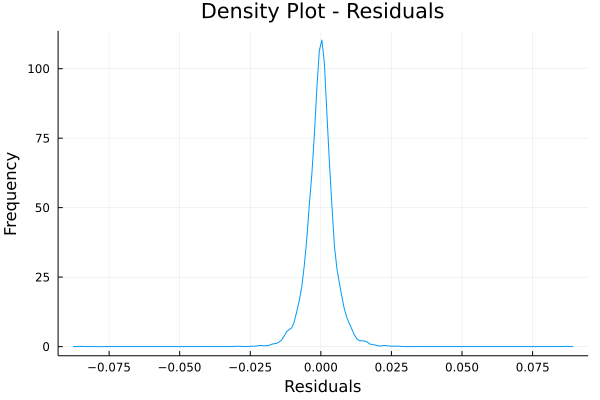

In [20]:
density(ehat1, title = "Density Plot - Residuals", ylabel = "Frequency", xlabel = "Residuals", legend = false)

We can do a hypothesis test on the "normality" of the regression residuals based on the Jarque-Bera test.  We add in the package needed for this and then invoke it.

In [21]:
Pkg.add("HypothesisTests");
using HypothesisTests;

   Resolving package versions...
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\mcnel\.julia\environments\v1.7\Manifest.toml`


In [22]:
jbstat = JarqueBeraTest(ehat1);
jbstat

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "0.09280632182522355 and 33.759191574272776"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-99

Details:
    number of observations:         5196
    JB statistic:                   2.04844e5


$\textbf{Expanded Set of Regressors}$

Now let's add in the Sing dollar, Malaysian Ringgit and the Thai baht into the regression to see if these variables have added explanatory value.

$\textbf{Nonsense Results}$

We see that the Sing dollar has a coefficient value of .31 while the effect of the US dollar is reduced to .48.  But is this a meaningful result?  Should one go to the currency division of an investment bank and advise the staff to start watching the Sing Dollar, that it is almost as important as the US dollar for predicting movements in the RMB against the Swiss Franc?
I think not.  The point is that one should know one's data.  Singapore also have an indexed currency system against the US dollar.  So the effect of the Sing dollar is just a proxy for the US dollar.  

To make this point more clearly, let's make the dependent variable the Sing Dollar, not the RMB, against the Swiss Fran and see what results we obtain.  

In [24]:
X = [xus xjp xkor xeur xuk xsin xmal xthai];
X1 = log.(X);
Xdiff = X1[2:end,:]- X1[1:end-1,:];
y2 = Xdiff[:,6];
Xdiff4= [Xdiff[:,1:5] ones(size(Xdiff,1),1)];
k = size(Xdiff4,2);
dgf = n-k;
beta = (Xdiff4'*Xdiff4)\Xdiff4'*y2;





In [26]:
ehat2 = y2 - Xdiff4*beta
ssr = (ehat2'*ehat2)/dgf;
ssy = (y2'*y2)/n;
rsq = 1 - ssr/ssy;
Sig_beta =  ssr*inv(Xdiff4'*Xdiff4);
Sig_beta1 = diag(Sig_beta);
Sig_beta2 = Sig_beta1 .^.5;
Tbeta = beta./Sig_beta2;
Stats =[beta Sig_beta2 Tbeta]

6×3 Matrix{Float64}:
  0.498763    0.0127171   39.2199
  0.0210623   0.00994831   2.11718
 -0.0302135   0.00800004  -3.77667
  0.263435    0.0184551   14.2743
  0.109247    0.0144152    7.5786
 -3.11351e-5  6.63403e-5  -0.469325

We see that that strongest determinats of the Sing Dollar against the Frank are the US Dollar and the Euro, both are significant.   Very similar results to what we found for China. Lets look at the frequency distribution of the residuals.
Again we see that can should reject the null hypothesis of a normal or Gaussian distribution for the regression residuals.

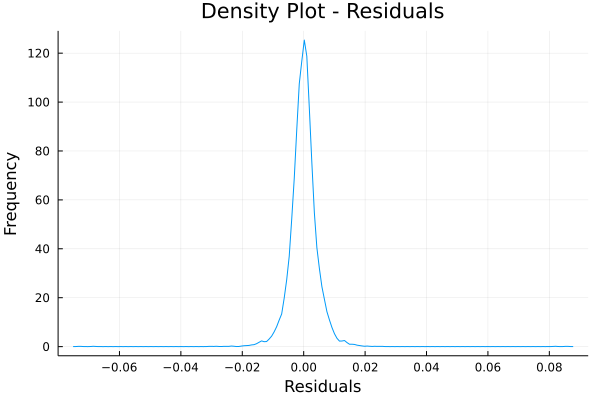

In [27]:
density(ehat2, title = "Density Plot - Residuals", ylabel = "Frequency", xlabel = "Residuals", legend = false)

In [28]:
jbstat = JarqueBeraTest(ehat2);
jbstat

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "0.7246054179873777 and 59.33555643268921"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-99

Details:
    number of observations:         5196
    JB statistic:                   6.8756e5
